In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Let us define the three input variables x1,x2 and x3 and the output nonlinear function y

In [4]:
x1 = np.linspace(1, 6, 10)
x2 = np.linspace(1, 6, 10)
x3 = np.linspace(1, 6, 10)

In [5]:
y = np.power((1+np.sqrt(x1) + np.power(x2,-1) +np.power(x3,-1.5)),2)

Define the membership function of each input variables. We will have triangular membership function for the input variables.

In [12]:
# Defining the triangular membership function for variable x1
x1_lo = fuzz.trimf(x1,[1,2,4])
x1_hi = fuzz.trimf(x1,[3,5,6])

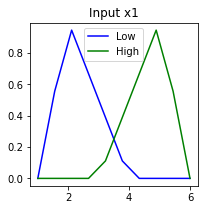

In [14]:
fig, (ax0) = plt.subplots(nrows=1, figsize=(3, 3))

ax0.plot(x1, x1_lo, 'b', linewidth=1.5, label='Low')
ax0.plot(x2, x1_hi, 'g', linewidth=1.5, label='High')
ax0.set_title('Input x1')
ax0.legend()

In [15]:
# Defining the trapezoidal membership function for variable x2
x2_lo = fuzz.trimf(x2,[1,3,5])
x2_hi = fuzz.trimf(x2,[2,4,6])

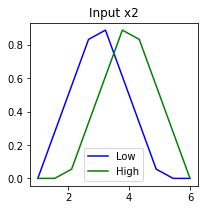

In [17]:
fig, (ax1) = plt.subplots(nrows=1, figsize=(3, 3))

ax1.plot(x2, x2_lo, 'b', linewidth=1.5, label='Low')
ax1.plot(x2, x2_hi, 'g', linewidth=1.5, label='High')
ax1.set_title('Input x2')
ax1.legend()

In [18]:
# Defining the triangular and trapezoidal membership function for variable x3
x3_lo = fuzz.trimf(x3,[1,2,4])
x3_hi = fuzz.trapmf(x3,[3,4,5,6])

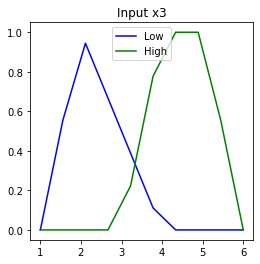

In [20]:
fig, (ax2) = plt.subplots(nrows=1, figsize=(4, 4))

ax2.plot(x3, x3_lo, 'b', linewidth=1.5, label='Low')
ax2.plot(x3, x3_hi, 'g', linewidth=1.5, label='High')
ax2.set_title('Input x3')
ax2.legend()

In [24]:
y_c = np.linspace(min(y),max(y),10)

In [26]:
y_c_lo = fuzz.trimf(y_c,[10,12,14])
y_c_hi = fuzz.trimf(y_c,[12,14,16])

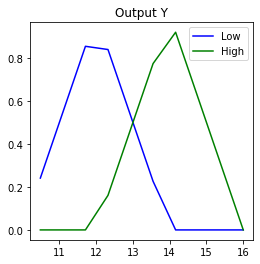

In [27]:
fig, (ax3) = plt.subplots(nrows=1, figsize=(4, 4))

ax3.plot(y_c, y_c_lo, 'b', linewidth=1.5, label='Low')
ax3.plot(y_c, y_c_hi, 'g', linewidth=1.5, label='High')
ax3.set_title('Output Y')
ax3.legend()

Rule Application

In [42]:
# we will interpret for the target data for 1.5
x1_lvl_lo = fuzz.interp_membership(x1, x1_lo,np.linspace(1.5,5.5,10))
x1_lvl_hi = fuzz.interp_membership(x1, x1_hi,np.linspace(1.5,5.5,10))

In [43]:
x2_lvl_lo = fuzz.interp_membership(x2, x2_lo,np.linspace(1.5,5.5,10))
x2_lvl_hi = fuzz.interp_membership(x2, x2_hi,np.linspace(1.5,5.5,10))

In [44]:
x3_lvl_lo = fuzz.interp_membership(x3, x3_lo,np.linspace(1.5,5.5,10))
x3_lvl_hi = fuzz.interp_membership(x3, x3_hi,np.linspace(1.5,5.5,10))

In [49]:
# We will define all the rules associated for this function.
# Since we are using and condition we will use Min function
# Since there are 3 inputs we have 2*2*2 =8 rules
rule1 = np.fmin(x1_lvl_lo,x2_lvl_lo,x3_lvl_lo)
rule2 = np.fmin(x1_lvl_lo,x2_lvl_lo,x3_lvl_hi)
rule3 = np.fmin(x1_lvl_lo,x2_lvl_hi,x3_lvl_lo)
rule4 = np.fmin(x1_lvl_hi,x2_lvl_lo,x3_lvl_lo)
rule5 = np.fmin(x1_lvl_hi,x2_lvl_hi,x3_lvl_lo)
rule6 = np.fmin(x1_lvl_hi,x2_lvl_lo,x3_lvl_hi)
rule7 = np.fmin(x1_lvl_lo,x2_lvl_hi,x3_lvl_hi)
rule8 = np.fmin(x1_lvl_hi,x2_lvl_hi,x3_lvl_hi)

In [61]:
#Now let's see the output membership function with respect to rule 1 & rule 8
y_low = np.fmin(rule1,y_c_lo)
y_hi = np.fmin(rule8, y_c_hi)
y0 = np.zeros_like(y_c)

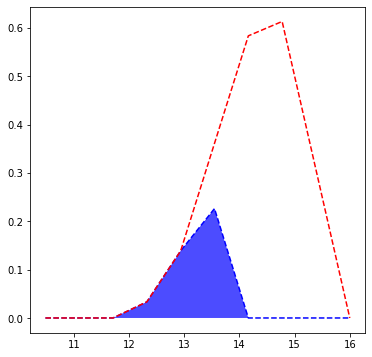

In [65]:
# Let's plot the outcome of rule 1 in the Output
fig, ax0 = plt.subplots(figsize=(6, 6))

ax0.fill_between(y_c, y0, y_low, facecolor='b', alpha=0.7)
ax0.plot(y_c, y_low, 'b', linewidth=1.5,linestyle='--' ,label='Low')
ax0.plot(y_c, y_hi, 'r', linewidth=1.5,linestyle='--' ,label='Low')

Like above we can plot the output membership activity for other rules

Reference:
https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem.html